In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

Give the dataset shopping_data.csv, perform data clustering by
Hierarchical Clustering by 2 attributes: Annual Income (k$) and
Spending Score (1-100) 
- Read data, normalize data if necessary
- Use dendrogram to determine the number of groups/clusters
- Apply algorithm
- Visualize results, comments 

In [2]:
customer_data = pd.read_csv('shopping_data.csv')
customer_data.shape

(200, 5)

In [3]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data = customer_data.iloc[:, 3:5].values
data[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

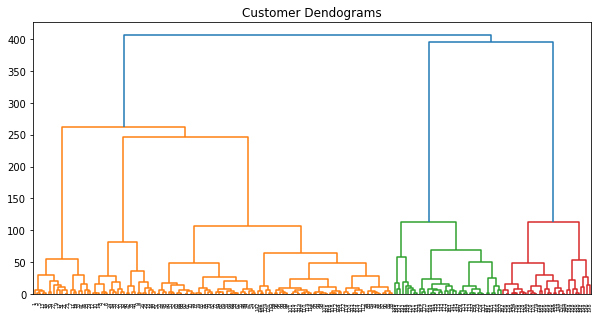

In [8]:
plt.figure(figsize=(10, 5))
plt.title("Customer Dendograms")
dend = hierarchy.dendrogram(hierarchy.linkage(data, method='ward'))

In [9]:
cluster = AgglomerativeClustering(n_clusters=5,
affinity='euclidean', linkage='ward')
cluster.fit(data)

AgglomerativeClustering(n_clusters=5)

In [10]:
cluster.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

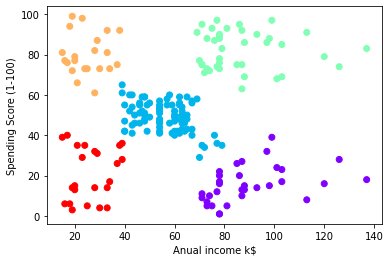

In [11]:
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Anual income k$")
plt.ylabel("Spending Score (1-100)")
plt.show()

Comment: We can see that the data points are concentrated in 5 clusters.
- The data points in the lower right corner belong to customers with high salary but high cost low spending. These are customers who spend their money carefully.
- Customers in the top right (blue data), these are customers with high wages and high spending. This is the type of customer the company targets.
- The customers in the middle (blue data) are the average salary customers
average and average spending. The largest number of customers belong to this group. Companies can also target these customers with the fact that they are having large numbers etc. 